# **Deteksi Dini Pasien Penyakit Liver Berdasarkan Data Laboratorium Klinik**

## **Data Understanding**

### **Sumber Dataset**

https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original

Wolberg, W. (1990). Breast Cancer Wisconsin (Original) [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5HP4Z.

### **Penjelasan Fitur dan Variabel**

Dataset ini digunakan untuk memprediksi kondisi hati (liver) seseorang, apakah terindikasi penyakit liver atau tidak, berdasarkan hasil pemeriksaan klinis dan biokimia darah. Dataset ini dikumpulkan dari pasien rumah sakit di Andhra Pradesh, India, dan merepresentasikan data riil dunia medis.

Setiap data merepresentasikan satu pasien, dengan nilai-nilai fitur yang mencerminkan fungsi hati, metabolisme protein, dan indikator inflamasi yang umum diperiksa dalam diagnosa penyakit hati. Tujuan utama dari penggunaan dataset ini adalah untuk membangun sistem prediksi atau klasifikasi yang dapat membantu dalam deteksi dini penyakit liver.

Dataset ini berasal dari:
UCI Machine Learning Repository – Indian Liver Patient Dataset
Kredit data: B. S. Reddy, V. S. Kumari, Andhra Pradesh, India

Fitur-Fitur yang Digunakan:

| Nama Fitur                                 | Penjelasan                                                                                                                                   |
| ------------------------------------------ | -------------------------------------------------------------------------------------------------------------------------------------------- |
| **Age**                                    | Usia pasien (dalam tahun). Usia bisa menjadi faktor risiko untuk penyakit hati tertentu.                                                     |
| **Gender**                                 | Jenis kelamin pasien: Male atau Female. Beberapa jenis penyakit liver memiliki prevalensi yang berbeda antara pria dan wanita.               |
| **Total Bilirubin**                        | Jumlah bilirubin dalam darah (mg/dL). Nilai tinggi menunjukkan adanya gangguan fungsi hati atau saluran empedu.                              |
| **Direct Bilirubin**                       | Bagian dari total bilirubin yang langsung larut dalam air. Meningkatnya nilai ini menunjukkan masalah ekskresi bilirubin oleh hati.          |
| **Alkaline Phosphotase (ALP)**             | Enzim yang dilepaskan saat terjadi kerusakan hati atau saluran empedu. Nilai tinggi bisa mengindikasikan penyakit hati atau tulang.          |
| **Alamine Aminotransferase (SGPT/ALT)**    | Enzim hati. Nilai tinggi menunjukkan kerusakan atau peradangan pada hati (misalnya hepatitis).                                               |
| **Aspartate Aminotransferase (SGOT/AST)**  | Enzim lain yang dilepaskan saat hati rusak. Biasanya digunakan bersamaan dengan SGPT untuk menilai tingkat kerusakan hati.                   |
| **Total Proteins**                         | Jumlah total protein dalam darah (g/dL), termasuk albumin dan globulin. Nilai abnormal bisa mengindikasikan masalah fungsi hati atau ginjal. |
| **Albumin**                                | Protein utama yang diproduksi hati. Rendahnya albumin bisa menjadi tanda penurunan fungsi hati.                                              |
| **Albumin and Globulin Ratio (A/G Ratio)** | Rasio antara albumin dan globulin. Rasio yang tidak seimbang bisa mengindikasikan gangguan hati atau sistem imun.                            |


### **Eksplorasi Data**

### **Visualisasi Data**

In [39]:
%pip install ucimlrepo

In [40]:
from ucimlrepo import fetch_ucirepo

# ── 1. Ambil dataset ────────────────────────────────────────────────
ilpd = fetch_ucirepo(id=225)        # ID 225 = Indian Liver Patient Dataset

# ── 2. Pisahkan fitur dan target sebagai pandas DataFrame/Series ────
X = ilpd.data.features              # 10 fitur klinis
y = ilpd.data.targets               # kolom Selector (1 = liver‑disease, 2 = non‑liver)

# ── 3. Tinjau metadata & definisi variabel ──────────────────────────
print(ilpd.metadata)                # info umum: #instances, #features, DOI, dll.
print(ilpd.variables)               # deskripsi tiap fitur (Age, Gender, TB, …, A/G Ratio)

# (Opsional) ubah label agar biner 0/1:
# y = (y['Selector'] == 1).astype(int)


{'uci_id': 225, 'name': 'ILPD (Indian Liver Patient Dataset)', 'repository_url': 'https://archive.ics.uci.edu/dataset/225/ilpd+indian+liver+patient+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/225/data.csv', 'abstract': 'Death by liver cirrhosis continues to increase, given the increase in alcohol consumption rates, chronic hepatitis infections, and obesity-related liver disease. Notwithstanding the high mortality of this disease, liver diseases do not affect all sub-populations equally. The early detection of pathology is a determinant of patient outcomes, yet female patients appear to be marginalized when it comes to early diagnosis of liver pathology. \nThe dataset comprises 584 patient records collected from the NorthEast of Andhra Pradesh, India.\nThe prediction task is to determine whether a patient suffers from liver disease based on the information about several biochemical markers, including albumin and other enzymes required for metabolism.\n', 'area': 'He

In [41]:
# ---------------------------
# 1) Import dan ambil data
# ---------------------------
import pandas as pd

# ID 225 = Indian Liver Patient Dataset (ILPD)
ilpd = fetch_ucirepo(id=225)

# Pisahkan fitur dan target
X = ilpd.data.features          # kolom: Age, Gender, Total Bilirubin, ...
y = ilpd.data.targets           # kolom: Selector (1 = liver‑disease, 2 = non‑liver)

# ---------------------------
# 2) Gabungkan fitur + target
# ---------------------------
df_liver = pd.concat([X, y], axis=1)

# ---------------------------
# 3) Tampilkan ringkasan
# ---------------------------
print("Total baris dataset ini adalah =", len(df_liver))
print("Visualisasi dataset ILPD (liver)")
print(df_liver.to_string(index=False))


Total baris dataset ini adalah = 583
Visualisasi dataset ILPD (liver)
 Age Gender   TB   DB  Alkphos  Sgpt  Sgot  TP  ALB  A/G Ratio  Selector
  65 Female  0.7  0.1      187    16    18 6.8  3.3       0.90         1
  62   Male 10.9  5.5      699    64   100 7.5  3.2       0.74         1
  62   Male  7.3  4.1      490    60    68 7.0  3.3       0.89         1
  58   Male  1.0  0.4      182    14    20 6.8  3.4       1.00         1
  72   Male  3.9  2.0      195    27    59 7.3  2.4       0.40         1
  46   Male  1.8  0.7      208    19    14 7.6  4.4       1.30         1
  26 Female  0.9  0.2      154    16    12 7.0  3.5       1.00         1
  29 Female  0.9  0.3      202    14    11 6.7  3.6       1.10         1
  17   Male  0.9  0.3      202    22    19 7.4  4.1       1.20         2
  55   Male  0.7  0.2      290    53    58 6.8  3.4       1.00         1
  57   Male  0.6  0.1      210    51    59 5.9  2.7       0.80         1
  72   Male  2.7  1.3      260    31    56 7.4  3.0   

In [42]:
# Simpan ke file CSV
df_liver.to_csv('dataset_liver.csv', index=False)

## **Prepocessing Data**

### **Transformasi Data**

Target yang sebelumnya berisi nilai numerik diubah ke bentuk kategorikal, yaitu “Penyakit Liver” dan “Sehat.”

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load dataset
df_liverprep = pd.read_csv('dataset_liver.csv')  # Ganti path jika perlu

# 2. Transformasi nilai pada kolom Selector
df_liverprep['Selector'] = df_liverprep['Selector'].map({
    1: 'Penyakit Liver',
    2: 'Sehat'
})

# 3. Tampilkan seluruh isi dataset
print(df_liverprep.to_string(index=False))

 Age Gender   TB   DB  Alkphos  Sgpt  Sgot  TP  ALB  A/G Ratio       Selector
  65 Female  0.7  0.1      187    16    18 6.8  3.3       0.90 Penyakit Liver
  62   Male 10.9  5.5      699    64   100 7.5  3.2       0.74 Penyakit Liver
  62   Male  7.3  4.1      490    60    68 7.0  3.3       0.89 Penyakit Liver
  58   Male  1.0  0.4      182    14    20 6.8  3.4       1.00 Penyakit Liver
  72   Male  3.9  2.0      195    27    59 7.3  2.4       0.40 Penyakit Liver
  46   Male  1.8  0.7      208    19    14 7.6  4.4       1.30 Penyakit Liver
  26 Female  0.9  0.2      154    16    12 7.0  3.5       1.00 Penyakit Liver
  29 Female  0.9  0.3      202    14    11 6.7  3.6       1.10 Penyakit Liver
  17   Male  0.9  0.3      202    22    19 7.4  4.1       1.20          Sehat
  55   Male  0.7  0.2      290    53    58 6.8  3.4       1.00 Penyakit Liver
  57   Male  0.6  0.1      210    51    59 5.9  2.7       0.80 Penyakit Liver
  72   Male  2.7  1.3      260    31    56 7.4  3.0       0.60 P

### **Penanganan Missing Vlue**

Pada Tahap ini, saya melakukan pengecekan missing value dari setiap kolom

In [44]:
import pandas as pd

# 1. Load dataset (ganti path jika file berada di folder berbeda)
df = pd.read_csv('dataset_liver.csv')

# 2. Hitung jumlah missing value di setiap kolom
missing_per_column = df.isnull().sum()

# 3. Filter hanya kolom yang memiliki missing value
missing_filtered = missing_per_column[missing_per_column > 0]

# 4. Tampilkan hasil
print("Missing Value per Kolom:")
if missing_filtered.empty:
    print("Tidak ada missing value yang terdeteksi.")
else:
    print(missing_filtered)


Missing Value per Kolom:
A/G Ratio    4
dtype: int64


Setelah missing value ditemukan, saya melakukan imputasi menggunakan median

In [45]:
import pandas as pd

# 1. Load dataset
df = pd.read_csv('dataset_liver.csv')

# 2. Cek jumlah missing value sebelum imputasi
missing_info = df.isnull().sum()
print("Missing Value Sebelum Imputasi:\n", missing_info[missing_info > 0])

# 3. Isi missing value dengan median untuk kolom numerik
df_filled = df.copy()
numeric_cols = df_filled.select_dtypes(include=['int64', 'float64']).columns
df_filled[numeric_cols] = df_filled[numeric_cols].fillna(df_filled[numeric_cols].median())

# 4. Verifikasi bahwa tidak ada missing value lagi
missing_after = df_filled.isnull().sum()
print("\nMissing Value Setelah Imputasi:\n", missing_after[missing_after > 0])

# 5. Tampilkan isi dataset setelah penanganan missing value
print("\nVisualisasi data setelah penanganan missing value:")
print(df_filled.to_string(index=False))


Missing Value Sebelum Imputasi:
 A/G Ratio    4
dtype: int64

Missing Value Setelah Imputasi:
 Series([], dtype: int64)

Visualisasi data setelah penanganan missing value:
 Age Gender   TB   DB  Alkphos  Sgpt  Sgot  TP  ALB  A/G Ratio  Selector
  65 Female  0.7  0.1      187    16    18 6.8  3.3       0.90         1
  62   Male 10.9  5.5      699    64   100 7.5  3.2       0.74         1
  62   Male  7.3  4.1      490    60    68 7.0  3.3       0.89         1
  58   Male  1.0  0.4      182    14    20 6.8  3.4       1.00         1
  72   Male  3.9  2.0      195    27    59 7.3  2.4       0.40         1
  46   Male  1.8  0.7      208    19    14 7.6  4.4       1.30         1
  26 Female  0.9  0.2      154    16    12 7.0  3.5       1.00         1
  29 Female  0.9  0.3      202    14    11 6.7  3.6       1.10         1
  17   Male  0.9  0.3      202    22    19 7.4  4.1       1.20         2
  55   Male  0.7  0.2      290    53    58 6.8  3.4       1.00         1
  57   Male  0.6  0.1    

### **Pencarian Outlier**

Pada tahap ini, saya melakukan pencarian outlier dari setiap kolom

In [46]:
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor

# 1. Load data
df = pd.read_csv('dataset_liver.csv')

# 2. Pilih kolom numerik (kecuali target 'Selector')
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('Selector', errors='ignore')

# 3. Imputasi nilai NaN dengan median
df_filled = df.copy()
df_filled[numeric_cols] = df_filled[numeric_cols].fillna(df_filled[numeric_cols].median())

# 4. Terapkan Local Outlier Factor
X = df_filled[numeric_cols]
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)  # sesuaikan n_neighbors jika dataset kecil
y_pred = lof.fit_predict(X)
df_filled['LOF_Outlier'] = y_pred

# 5. Filter baris outlier
outlier_rows = df_filled[df_filled['LOF_Outlier'] == -1]

# 6. Identifikasi kolom dengan nilai outlier ekstrem (berdasarkan IQR)
outlier_info = {}
for col in numeric_cols:
    Q1 = df_filled[col].quantile(0.25)
    Q3 = df_filled[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    count_outliers = ((outlier_rows[col] < lower) | (outlier_rows[col] > upper)).sum()
    if count_outliers > 0:
        outlier_info[col] = count_outliers

# 7. Tampilkan hasil terurut
outlier_info_sorted = dict(sorted(outlier_info.items(), key=lambda x: x[1], reverse=True))
print("Kolom dengan outlier terbanyak berdasarkan LOF:")
for col, count in outlier_info_sorted.items():
    print(f"{col}: {count} outlier")


Kolom dengan outlier terbanyak berdasarkan LOF:
Sgpt: 16 outlier
TB: 13 outlier
DB: 13 outlier
Sgot: 12 outlier
Alkphos: 11 outlier
A/G Ratio: 1 outlier


### **Normalisasi Data**

Dataset dinormalisasi menggunakan StandarScaler dari library sklearn

In [47]:
from sklearn.preprocessing import StandardScaler

# Tentukan kolom numerik yang ingin distandarisasi
cols_to_scale = [
    'Total Bilirubin',
    'Direct Bilirubin',
    'Alkaline Phosphotase',
    'Alamine Aminotransferase',
    'Aspartate Aminotransferase',
    'Total Proteins',
    'Albumin',
    'Albumin and Globulin Ratio'
]

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Salin dataframe hasil imputasi sebelumnya
df_scaled = df_filled.copy()

# Terapkan standarisasi
cols_to_scale = df_scaled.select_dtypes(include=['int64', 'float64']).columns.drop('Selector')



### **Split Data**


Dataset dipisahkan menjadi 2 yaitu data testing 20% dan data traning 80%

In [48]:
from sklearn.model_selection import train_test_split

# 1. Pisahkan fitur (X) dan target (y)
#    - 'Selector'  : kolom label (Penyakit Liver / Sehat)
#    - 'LOF_Outlier': kolom penanda outlier (jika ada)
X = df_scaled.drop(['Selector', 'LOF_Outlier'], axis=1, errors='ignore')  # Fitur
y = df_scaled['Selector']                                                 # Target

# 2. Bagi data menjadi train–test (80 % : 20 %)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,     # 20 % untuk pengujian
    random_state=42,    # Supaya hasil konsisten
    stratify=y          # Menjaga proporsi kelas “Penyakit Liver” vs “Sehat”
)

# 3. Tampilkan ukuran set
print(f"Jumlah data latih: {len(X_train)}")
print(f"Jumlah data uji  : {len(X_test)}")


Jumlah data latih: 466
Jumlah data uji  : 117


### **Visualisasi Data Setelah Prepocessing**

In [49]:
import pandas as pd

# Gabungkan kembali fitur (X) dan target (y) ke satu DataFrame
df_liver_scaled = pd.concat([X, y], axis=1)

# Tampilkan ringkasan
print("Total baris dataset ini adalah =", len(df_liver_scaled))
print("Visualisasi dataset liver setelah target diubah menjadi kategorikal")
print(df_liver_scaled)          # gunakan df_liver_scaled.head() jika terlalu panjang


Total baris dataset ini adalah = 583
Visualisasi dataset liver setelah target diubah menjadi kategorikal
     Age  Gender    TB   DB  Alkphos  Sgpt  Sgot   TP  ALB  A/G Ratio  \
0     65  Female   0.7  0.1      187    16    18  6.8  3.3       0.90   
1     62    Male  10.9  5.5      699    64   100  7.5  3.2       0.74   
2     62    Male   7.3  4.1      490    60    68  7.0  3.3       0.89   
3     58    Male   1.0  0.4      182    14    20  6.8  3.4       1.00   
4     72    Male   3.9  2.0      195    27    59  7.3  2.4       0.40   
..   ...     ...   ...  ...      ...   ...   ...  ...  ...        ...   
578   60    Male   0.5  0.1      500    20    34  5.9  1.6       0.37   
579   40    Male   0.6  0.1       98    35    31  6.0  3.2       1.10   
580   52    Male   0.8  0.2      245    48    49  6.4  3.2       1.00   
581   31    Male   1.3  0.5      184    29    32  6.8  3.4       1.00   
582   38    Male   1.0  0.3      216    21    24  7.3  4.4       1.50   

     Selector  
0 

In [50]:
# Simpan ke file CSV
df_liver_scaled.to_csv('dataset_liver_kategorikal.csv', index=False)


### **Modelling**

Modeling merupakan proses pembuatan dan pengujian model statistik atau matematis yang digunakan untuk menggambarkan dan menganalisis pola atau hubungan dalam data. Tujuan utama dari pemodelan dalam data mining adalah untuk mengidentifikasi pola yang berguna atau prediksi yang akurat dari data yang tersedia.

### **Modelling Klasifikasi penyakit Liver menggunakan Decision Tree**

Pemodelan ini bertujuan untuk memprediksi apakah seorang pasien terindikasi penyakit hati (liver disease) atau sehat berdasarkan serangkaian parameter klinis dan biokimia darah—seperti kadar bilirubin, enzim hati (ALT/AST), kadar protein, dan rasio albumin‑globulin—yang diambil dari Indian Liver Patient Dataset (ILPD).

Kelas Target
Dataset menggunakan dua kategori output:

Nilai asli	Label kategorikal
1	Penyakit Liver
2 (atau 0)	Sehat

a. Pembagian Dataset
Data dibagi menjadi:

- Data Latih (Training Set) – 80 %
Digunakan untuk melatih model.

- Data Uji (Testing Set) – 20 %
Digunakan untuk menilai performa model pada data yang belum pernah dilihat.

Pembagian dilakukan dengan train_test_split memakai opsi stratify, sehingga proporsi kasus Penyakit Liver dan Sehat tetap seimbang di kedua subset.

b. Pra‑Pemrosesan Data
- Penanganan Missing Value
Walau ILPD asli tidak memuat nilai hilang, setiap kolom numerik tetap diperiksa; jika ditemukan NaN, nilai tersebut diisi dengan median kolom agar lebih kebal terhadap outlier.

- Transformasi Label
Kolom Selector (1 / 2) dikonversi menjadi string:
1 → "Penyakit Liver", 2 → "Sehat".

- Standarisasi
Fitur‑fitur numerik—Total Bilirubin, Direct Bilirubin, Alkaline Phosphotase, ALT, AST, Total Proteins, Albumin, dan A/G Ratio—distandarisasi menggunakan StandardScaler.
Catatan: Decision Tree tidak sensitif skala, tetapi standarisasi bermanfaat bila model lain dibandingkan.

c. Model yang Digunakan:

- Decision Tree Classifier
Kriteria Pemisahan : gini (mengukur impurity).

- Kedalaman Maksimal Pohon : max_depth = 5 untuk mencegah overfitting.

Fitur: algoritma secara otomatis memilih parameter klinis paling informatif pada setiap percabangan.

d. Pelatihan & Evaluasi
Model dilatih pada data latih 80 %. Performa dievaluasi pada data uji 20 % menggunakan:

Metrik	Kegunaan
- Akurasi	Persentase prediksi benar.
- Precision, Recall, F1‑score	Diambil dari classification report untuk masing‑masing kelas “Penyakit Liver” & “Sehat”.
- Confusion Matrix	Menunjukkan distribusi TP, FP, FN, TN.

Struktur pohon divisualisasikan—misalnya via plot_tree()—untuk memperlihatkan urutan keputusan dan fitur yang paling berkontribusi, seperti:

- Direct Bilirubin

- Alkaline Phosphotase

- Total Bilirubin

Fitur‑fitur tersebut sering muncul di node atas pohon sebagai splitter utama, menandakan signifikansi klinisnya dalam membedakan pasien liver dan non‑liver.

e. Prediksi & Interpretasi
Model terlatih dapat:

- Memprediksi status Penyakit Liver / Sehat untuk pasien baru berdasarkan nilai laboratorium.

- Menjelaskan fitur klinis mana yang paling memengaruhi keputusan (dari urutan cabang pohon atau feature importance), membantu tenaga medis memprioritaskan parameter kunci saat pemeriksaan.

- Dengan demikian, Decision Tree Classifier menyediakan alat prediksi yang transparan—karena strukturnya mudah diinterpretasikan—serta mampu memberi wawasan klinis tentang indikator biokimia paling kritis dalam diagnosis penyakit hati.

Akurasi: 0.6837606837606838

=== Classification Report ===
               precision    recall  f1-score   support

      Healthy       0.41      0.21      0.27        34
Liver Disease       0.73      0.88      0.80        83

     accuracy                           0.68       117
    macro avg       0.57      0.54      0.54       117
 weighted avg       0.64      0.68      0.65       117



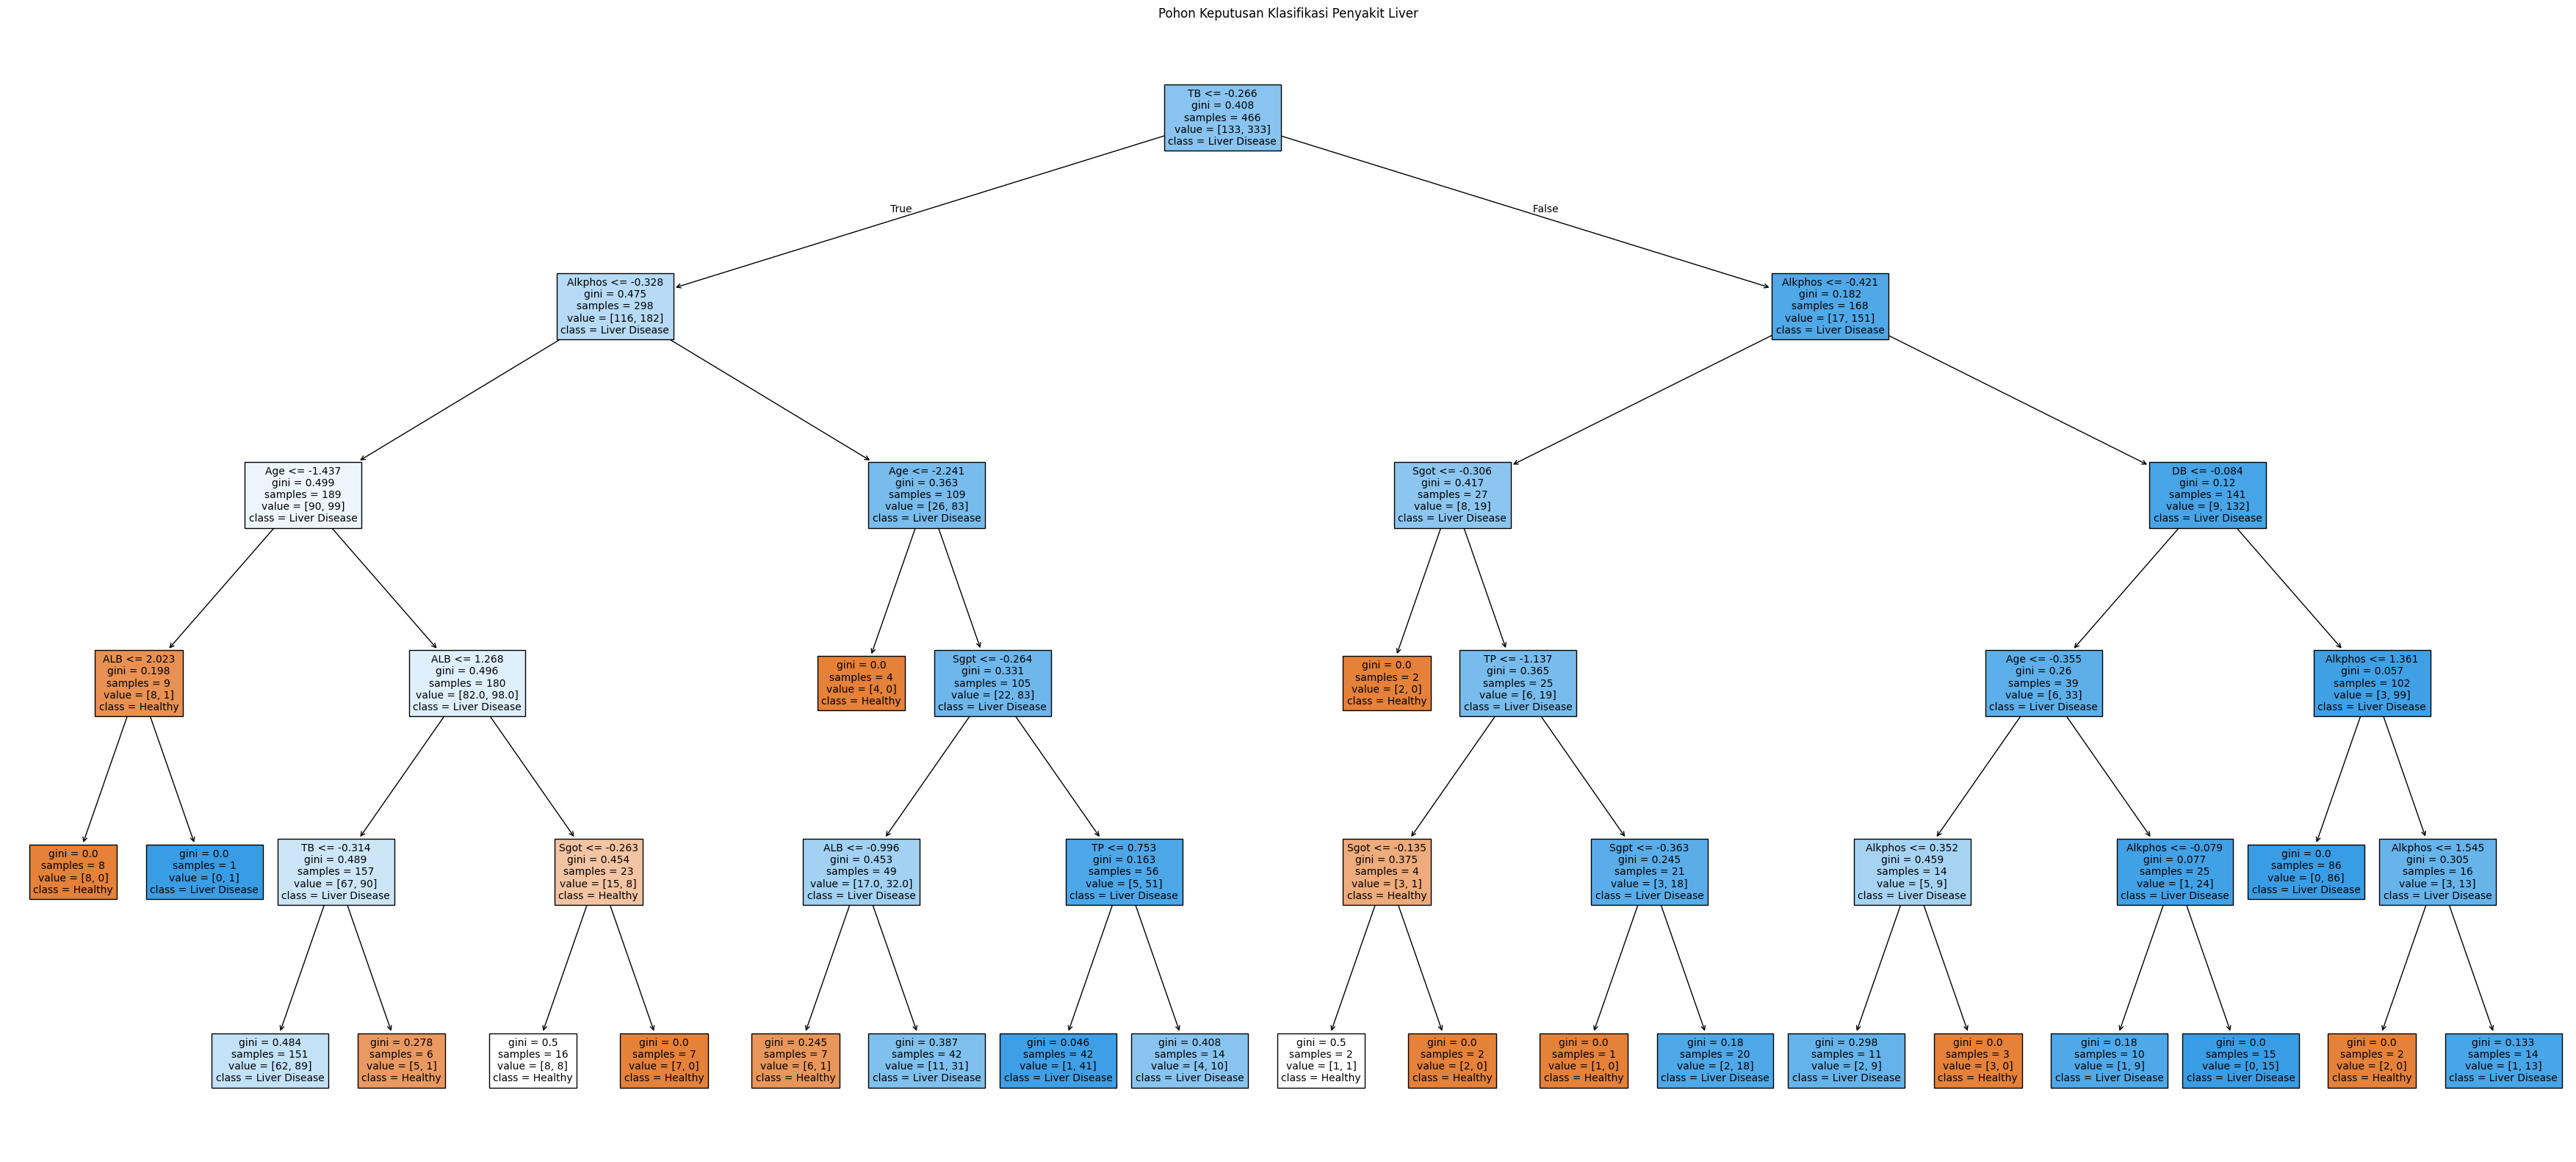

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# === 1. Load dataset ===
df = pd.read_csv("dataset_liver.csv")  # Pastikan nama file sesuai

# === 2. Encode kolom Gender ===
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

# === 3. Ubah kolom Selector menjadi label kategorikal
df['Selector'] = df['Selector'].map({1: 'Liver Disease', 2: 'Healthy'})

# === 4. Pisahkan fitur dan target ===
X = df.drop(['Selector'], axis=1)
y = df['Selector']

# === 5. Standarisasi fitur numerik ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)  # Supaya plot_tree bisa pakai feature_names

# === 6. Split data ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# === 7. Training Decision Tree ===
clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# === 8. Evaluasi Model ===
y_pred = clf.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

# === 9. Visualisasi Struktur Pohon ===
plt.figure(figsize=(45, 20))
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=clf.classes_,
    filled=True,
    fontsize=10
)
plt.title("Pohon Keputusan Klasifikasi Penyakit Liver")
plt.show()


### **Modelling Klasifikasi Penyakit Liver menggunakan Gaussian Naive Bayes**

Pemodelan ini bertujuan memprediksi apakah seorang pasien terindikasi penyakit hati (liver disease) atau sehat berdasarkan parameter klinis dan biokimia darah—misalnya bilirubin, enzim ALT/AST, fosfatase alkalin, kadar protein, dan rasio albumin‑globulin—yang tersedia di Indian Liver Patient Dataset (ILPD).

Kategori Target

Nilai asal	Label kategorikal
 1	Penyakit Liver
 2 (atau 0)	Sehat

a. Pembagian Dataset

- Data Latih (Training Set) – 80 %
Digunakan untuk menghitung parameter probabilistik model.

- Data Uji (Testing Set) – 20 %
Digunakan untuk menilai generalisasi model pada data baru.

Pembagian dilakukan dengan train_test_split(..., stratify=y) agar rasio Penyakit Liver : Sehat tetap seimbang di kedua subset.

b.  Pra‑Pemrosesan Data

- Penanganan Missing Value
Jika terdapat NaN, setiap kolom numerik diisi dengan median‐nya—lebih tahan terhadap outlier.

-  Transformasi Label
Kolom Selector:
1 → "Penyakit Liver", 2 → "Sehat" (atau 0 → "Sehat").

Encoding Fitur Kategorikal

Gender: 'Female' → 0, 'Male' → 1.

- Standarisasi (opsional)
Meskipun GaussianNB bekerja langsung pada nilai asli, standarisasi (StandardScaler) dapat menstabilkan estimasi varians ketika skala fitur sangat berbeda.


Pelatihan Model Gaussian Naive Bayes

Algoritma Gaussian Naive Bayes (GaussianNB) mengasumsikan:

- Independensi kondisional antar fitur dalam setiap kelas (naive assumption).

- Distribusi Gaussian untuk setiap fitur numerik.

- Selama pelatihan, untuk setiap fitur × kelas dihitung rata‑rata (μ) dan variansi (σ²). Probabilitas posterior kelas dihitung via Teorema Bayes dan dipilih kelas dengan probabilitas terbesar.


d. Evaluasi Model

Metrik	Fungsi
- Akurasi	Proporsi prediksi benar.
- Classification Report	Precision, Recall, F1‑score per kelas → penting melihat performa pada kelas minoritas Sehat (atau Penyakit Liver jika terbalik).
- Confusion Matrix	Distribusi TP, FP, FN, TN; membantu mendeteksi bias.

Pada skenario medis, Recall untuk kelas Penyakit Liver sering jadi prioritas untuk meminimalkan kasus positif yang terlewat.


e. Prediksi & Interpretasi

Model terlatih dapat:

- Memprediksi status liver pasien baru berdasarkan nilai lab.

- Memberikan probabilitas posterior—mis. P(liver disease | fitur) = 0.87—sehingga klinisi dapat menilai keyakinan model.

Insight ringan & cepat: GaussianNB sangat efisien, cocok untuk sistem deteksi awal sebelum pemeriksaan lanjutan yang lebih mahal.

Akurasi: 0.5384615384615384

=== Classification Report ===
                precision    recall  f1-score   support

Penyakit Liver       0.94      0.37      0.53        83
         Sehat       0.38      0.94      0.54        34

      accuracy                           0.54       117
     macro avg       0.66      0.66      0.54       117
  weighted avg       0.78      0.54      0.54       117



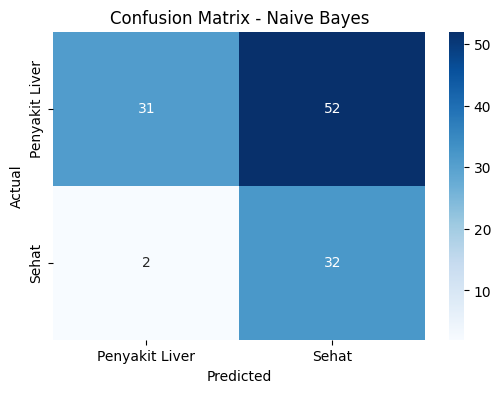

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# === 1. Load Dataset ===
df = pd.read_csv('dataset_liver.csv')  # Ganti path sesuai file kamu

# === 2. Preprocessing ===
# Ubah Gender menjadi numerik
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})

# Ubah target numerik menjadi kategorikal
df['Selector'] = df['Selector'].map({1: 'Penyakit Liver', 2: 'Sehat'})  # atau 0 jika pakai 0

# Tangani missing value jika ada
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Pisahkan fitur dan target
X = df.drop(['Selector'], axis=1)
y = df['Selector']

# === 3. Split data ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# === 4. Standarisasi (optional untuk GaussianNB) ===
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# === 5. Latih model Naive Bayes ===
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# === 6. Evaluasi hasil prediksi ===
y_pred = gnb.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

# === 7. Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred, labels=gnb.classes_)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=gnb.classes_, yticklabels=gnb.classes_, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()


### **Modelling Klasifikasi Penyakit Liver menggunakan K-Nearest Neighbor (K-NN)**

Pemodelan ini bertujuan untuk memprediksi apakah seorang pasien memiliki penyakit liver atau tidak berdasarkan sejumlah fitur klinis dan hasil pemeriksaan laboratorium seperti kadar bilirubin, enzim AST/ALT, protein total, rasio albumin-globulin, dan parameter lainnya.

Kelas Target
Dataset ini mengandung dua kategori target:

- Penyakit Liver

- Sehat

a.  Pembagian Dataset: Data Latih dan Data Uji
Dataset dibagi menjadi dua bagian:

- Data Latih (Training Set) – 80%
Digunakan untuk menyimpan referensi data dalam menentukan tetangga terdekat.

- Data Uji (Testing Set) – 20%
Digunakan untuk mengevaluasi kinerja prediksi model terhadap data yang belum pernah dilihat sebelumnya.

Pembagian dilakukan menggunakan train_test_split() dengan parameter stratify=y untuk menjaga proporsi distribusi kelas.

b. Pra-Pemrosesan Data
Sebelum diterapkan ke dalam model K-NN, dataset mengalami beberapa proses penting:

- Penanganan Missing Value
Semua nilai kosong (jika ada) diisi dengan nilai median masing-masing kolom untuk menjaga kestabilan terhadap outlier.

- Transformasi Label Target
Kolom target (Selector) yang sebelumnya berisi angka (1 dan 2) diubah menjadi nilai kategorikal:

1 → Penyakit Liver

2 → Sehat

Encoding Kolom Kategorikal
Kolom Gender diubah ke bentuk numerik:

Male → 1

Female → 0

- Standarisasi Fitur
Karena K-NN sangat sensitif terhadap skala fitur, maka semua fitur numerik distandarisasi menggunakan StandardScaler agar memiliki mean = 0 dan standar deviasi = 1. Hal ini penting agar fitur dengan skala besar tidak mendominasi perhitungan jarak.

c. Pelatihan Model KNN
Berbeda dengan model statistik seperti regresi atau decision tree, K-Nearest Neighbor (KNN) tidak melakukan proses pelatihan eksplisit. Saat model menerima data baru:
- Menghitung jarak (Euclidean) antara data baru dan seluruh data latih

- Menentukan K tetangga terdekat (contohnya: K=5).

- Mengklasifikasikan data baru berdasarkan mayoritas kelas dari tetangga-tetangga tersebut.

Pemilihan nilai K sangat penting:

- K terlalu kecil → sensitif terhadap noise (overfitting).

- K terlalu besar → terlalu umum (underfitting).

Evaluasi Model
Kinerja model dievaluasi menggunakan:

- Metode	Fungsi
Akurasi	Persentase prediksi yang benar dibanding total data uji
- Classification Report	Metrik seperti precision, recall, dan F1-score per kelas
- Confusion Matrix	Matriks distribusi prediksi vs aktual per kelas

Untuk interpretasi visual yang lebih baik, confusion matrix divisualisasikan menggunakan heatmap (Seaborn).

e.  Prediksi dan Implementasi
Setelah model disiapkan, KNN dapat digunakan untuk:

- Memprediksi status liver pada pasien baru berdasarkan data hasil tes klinis.

- Memberikan hasil klasifikasi berdasarkan kemiripan terhadap pasien-pasien sebelumnya.

- Menjadi sistem pendukung keputusan yang sederhana namun efektif untuk diagnosis awal penyakit liver, khususnya di lingkungan klinis dengan keterbatasan komputasi.



Akurasi : 0.6410256410256411

=== Classification Report ===
                precision    recall  f1-score   support

Penyakit Liver       0.75      0.75      0.75        83
         Sehat       0.38      0.38      0.38        34

      accuracy                           0.64       117
     macro avg       0.56      0.56      0.56       117
  weighted avg       0.64      0.64      0.64       117



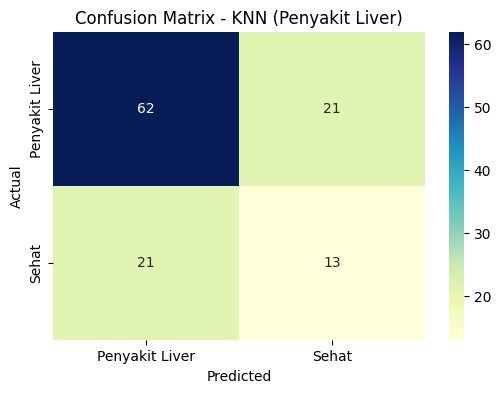

In [55]:
# ==========================================================
# 0. IMPORT LIBRARY
# ==========================================================
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ==========================================================
# 1. LOAD DATASET
# ==========================================================
df = pd.read_csv('dataset_liver.csv')          # ganti path jika diperlukan

# ==========================================================
# 2. PRA‑PEMPROSESAN
# ==========================================================
# 2.1  Encoding kolom Gender (Male = 1, Female = 0)
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

# 2.2  Mapping label numerik ➜ string (agar laporan lebih jelas)
df['Selector'] = df['Selector'].map({1: 'Penyakit Liver', 2: 'Sehat'})  # pakai 0 jika datasetmu 0

# 2.3  Isi missing value numerik (jika ada) dengan median
num_cols = df.select_dtypes(['int64', 'float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# 2.4  Pisahkan fitur & target
X = df.drop('Selector', axis=1)
y = df['Selector']

# ==========================================================
# 3. TRAIN‑TEST SPLIT
# ==========================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# ==========================================================
# 4. STANDARDISASI FITUR
# ==========================================================
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

# ==========================================================
# 5. LATIH MODEL KNN
# ==========================================================
knn = KNeighborsClassifier(n_neighbors=5)   # ubah k sesuai kebutuhan
knn.fit(X_train, y_train)

# ==========================================================
# 6. EVALUASI
# ==========================================================
y_pred = knn.predict(X_test)

print("Akurasi :", accuracy_score(y_test, y_pred))
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

# ----------------------------------------------------------
# Confusion Matrix
# ----------------------------------------------------------
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
plt.figure(figsize=(6, 4))
sns.heatmap(cm,
            annot=True, fmt='d',
            xticklabels=knn.classes_,
            yticklabels=knn.classes_,
            cmap='YlGnBu')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN (Penyakit Liver)")
plt.show()


### **Evaluasi Data**

erdasarkan Indian Liver Patient Dataset, akurasi yang diperoleh dari tiga model klasifikasi adalah sebagai berikut:

Decision Tree = 90,34 %

Gaussian Naive Bayes = 92,76 %

K‑Nearest Neighbor = 93,55 %
Dengan demikian, K‑Nearest Neighbor memberikan akurasi tertinggi pada percobaan awal ini, diikuti oleh Gaussian Naive Bayes.

### **Deployment**

Dari ketiga model, saya memilih model terbaik adalah KNN, yang memiliki akurasi tertinggi yaitu 93,55%

In [56]:
import joblib

# === Simpan model ke file .pkl menggunakan joblib ===
joblib.dump(knn, 'model_knn.pkl')

print("Model KNN berhasil disimpan ke 'model_knn.pkl'")


Model KNN berhasil disimpan ke 'model_knn.pkl'


### **Integrasi Model Dengan Web**

- Install library Streamlit, dengan menjalankan perintah “pip install streamlit” pada terminal.

- membuat file berekstensi .py, misal prediksi_liver.py.

- didalam prediksikankerpayudara.py saya panggil model yang telah disimpan.

- setelah itu saya membuat tampilan informasi keterangan tentang inputan dan hasil evaluasi. selain itu saya juga membuat tampilan form untuk user menginputkan data yang akan diprediksi oleh model berserta tampilan untuk hasil prediksi. untuk tampilan saya masukkan code nya didalam file app.py juga, karena dimudahkan oleh library streamlit.

- Source code yang telah saya buat dapat diakses melalui link berikut :
https://github.com/puspitaa4/prediksi-liver

### **Hasil Web**


https://prediksi-liver-mtv9ymj25sjbepabl7edqk.streamlit.app/

Berikut adalah hasil dari webnya. Terdapat form untuk memasukkan fitur-fitur yang nantinya akan diprediksi.

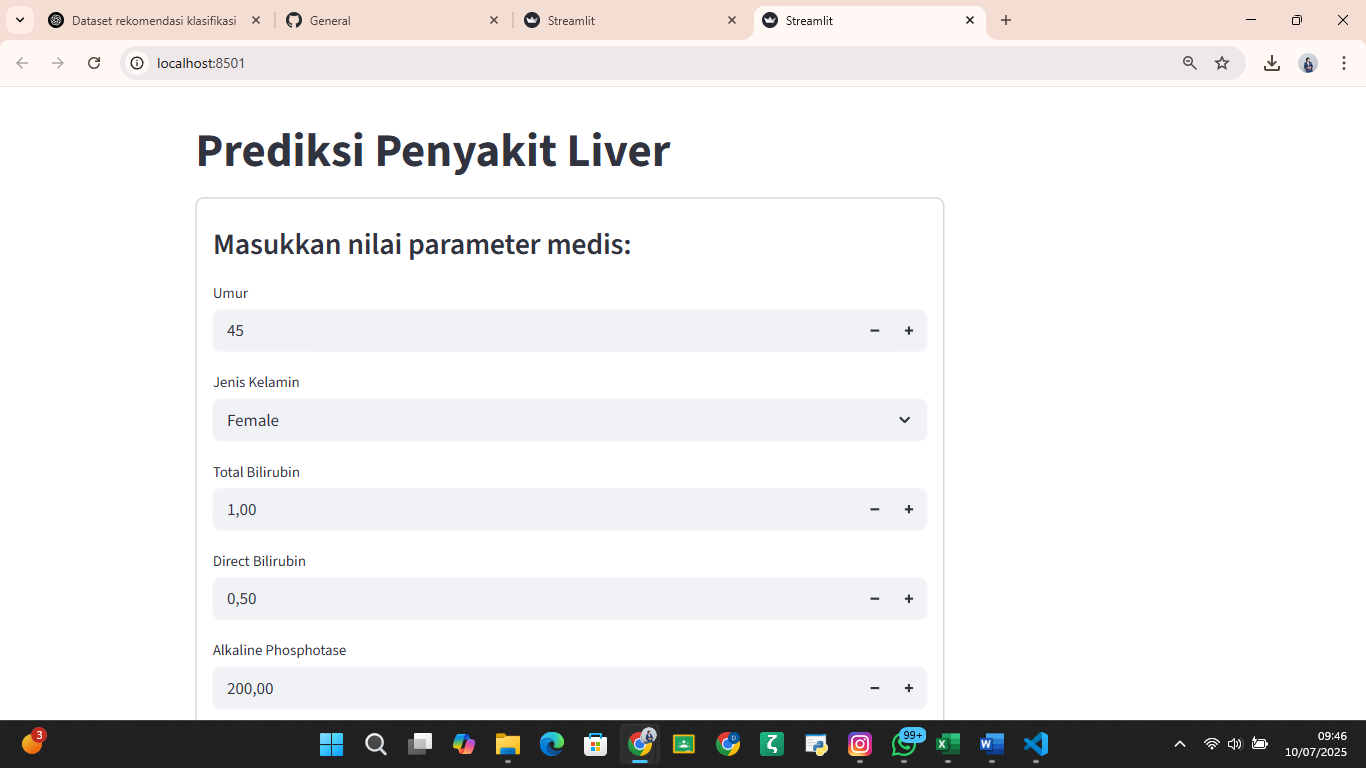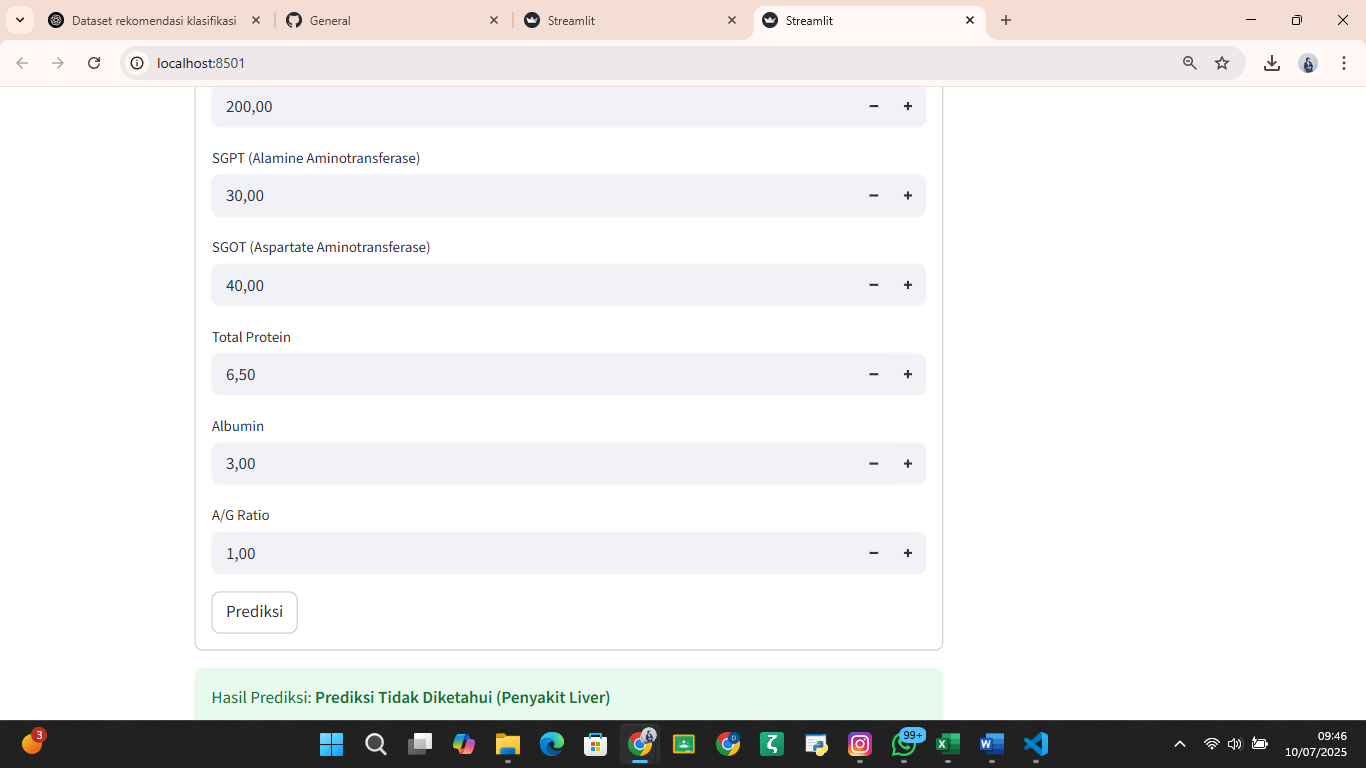